Imports

In [29]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, losses, regularizers
import matplotlib.pyplot as plt


Load mnist and reshape

In [30]:
mnist = datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)


Reduce train data



In [31]:
max_per_class = 5
counter = {}
min_x_train = []
min_y_train = []

for i in range(len(y_train)):
    if y_train[i] not in counter:
        counter[y_train[i]] = 0
    if counter[y_train[i]] == max_per_class:
        continue
    min_x_train.append(x_train[i])
    min_y_train.append(y_train[i])
    counter[y_train[i]] += 1

x_train = np.array(min_x_train)
y_train = np.array(min_y_train)

Create model

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.95))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.001)))

model.summary()

model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_14 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)        

Train

In [33]:
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
2/2 [==============================] - 2s 1s/step - loss: 2.9985 - accuracy: 0.0200 - val_loss: 2.6681 - val_accuracy: 0.1009
Epoch 2/1000
2/2 [==============================] - 1s 1s/step - loss: 2.8480 - accuracy: 0.0800 - val_loss: 2.6542 - val_accuracy: 0.1022
Epoch 3/1000
2/2 [==============================] - 1s 1s/step - loss: 2.7164 - accuracy: 0.0400 - val_loss: 2.6414 - val_accuracy: 0.1073
Epoch 4/1000
2/2 [==============================] - 1s 991ms/step - loss: 2.7745 - accuracy: 0.0600 - val_loss: 2.6294 - val_accuracy: 0.1413
Epoch 5/1000
2/2 [==============================] - 1s 1s/step - loss: 2.6019 - accuracy: 0.1200 - val_loss: 2.6188 - val_accuracy: 0.2029
Epoch 6/1000
2/2 [==============================] - 1s 1s/step - loss: 2.6683 - accuracy: 0.0600 - val_loss: 2.6104 - val_accuracy

View results and training progression

2/2 - 0s - loss: 0.3113 - accuracy: 1.0000
Train stats: 0.31133580207824707 1.0
313/313 - 1s - loss: 1.0395 - accuracy: 0.8053
Test stats: 1.0395065546035767 0.8052999973297119


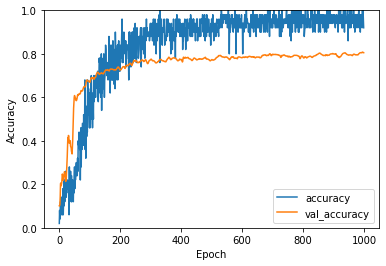

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('Train stats:', train_loss, train_acc)

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test stats:', test_loss, test_acc)